# EFC 3 - Redes Neurais - IA048

## Aluno: Jitesh Ashok Manilal Vassaram, RA:175867

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = np.load('../EFC3/bloodmnist.npz')

In [3]:
TrainX = data["train_images"]
TrainY = data["train_labels"]
ValX = data["val_images"]
ValY = data["val_labels"]
TestX = data["test_images"]
TestY = data["test_labels"]

In [4]:
print(f'dados de treinamento: \n {len(TrainX[0])}')

print('--'*20)
print(f'\n {TrainX/255}')

dados de treinamento: 
 28
----------------------------------------

 [[[[0.98039216 0.8745098  0.80784314]
   [1.         0.89803922 0.83137255]
   [0.98431373 0.87058824 0.80784314]
   ...
   [1.         0.93333333 0.76470588]
   [0.98431373 0.90196078 0.7254902 ]
   [1.         0.91764706 0.74901961]]

  [[1.         0.89803922 0.82352941]
   [1.         0.89803922 0.82352941]
   [0.95686275 0.84313725 0.78039216]
   ...
   [0.99607843 0.90980392 0.75686275]
   [0.99607843 0.91372549 0.74509804]
   [1.         0.94901961 0.78823529]]

  [[1.         0.90588235 0.81568627]
   [1.         0.89019608 0.80392157]
   [0.93333333 0.82352941 0.74117647]
   ...
   [1.         0.91372549 0.79215686]
   [0.98431373 0.89803922 0.75294118]
   [1.         0.94901961 0.79607843]]

  ...

  [[0.91372549 0.8        0.6745098 ]
   [0.9372549  0.82352941 0.70588235]
   [0.96078431 0.85490196 0.7372549 ]
   ...
   [1.         0.88235294 0.78039216]
   [1.         0.88627451 0.78431373]
   [1.         

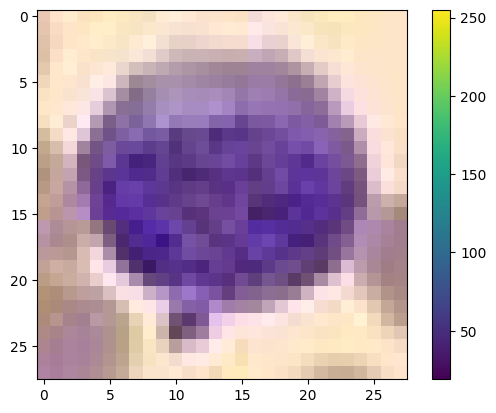

In [5]:
plt.imshow(TestX[0])
plt.colorbar()
plt.show()

In [6]:
TrainX_n = TrainX/255
TestX_n = TestX/255
ValX_n = ValX/255

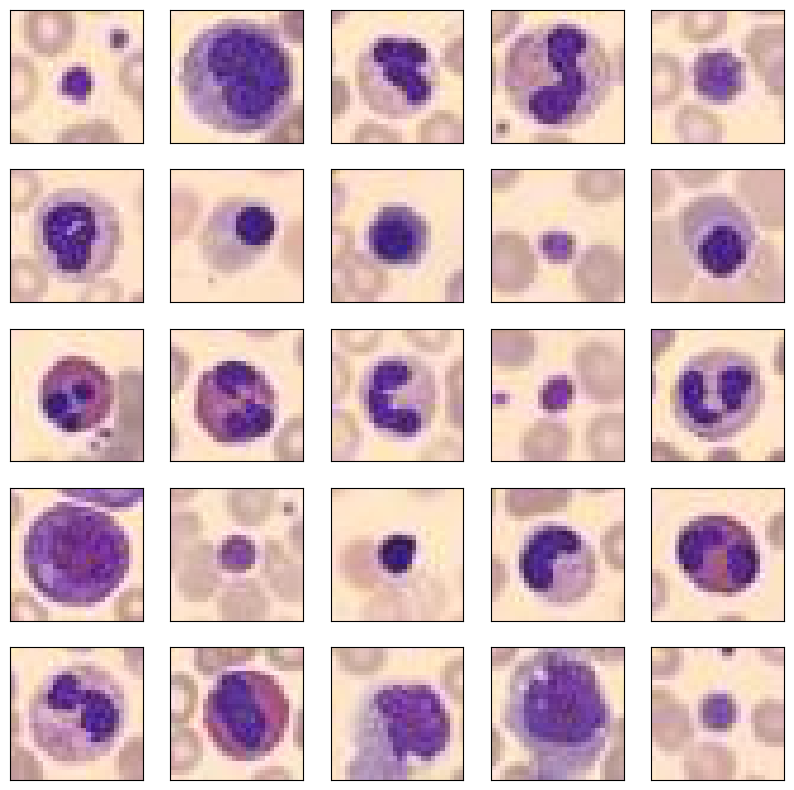

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(TrainX_n[i], cmap=plt.cm.binary)
    # plt.xlabel(class_names[TrainY[i]])
plt.show()

# Criação do modelo MLP

Será implementado uma MLP com uma camada intermediária de 128 neurônios e função de ativação *relu*. Para a camada de saída, foi adicionado uma função de ativação *softmax*.

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(28, 28, 3)),
#     tf.keras.layers.Flatten(),   # Camada de entrada
#     tf.keras.layers.Dense(128, activation='relu'),      # Camada intermediária
#     tf.keras.layers.Dense(8,activation='softmax')       # Camada de saída
# ])

# model.compile(optimizer='SGD',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# model.summary()

# Etapa de validação do modelo

Com o modelo indicado acima, será feito uma etapa de validação na qual o hiper-parâmetro que será avaliado é o *batch_size*

In [24]:
batchs_size = [8, 16, 32, 64, 128]
best_accuracy = 0
best_size = None

for batch_size in batchs_size:
    
   model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 3)),
    tf.keras.layers.Flatten(),   # Camada de entrada
    tf.keras.layers.Dense(128, activation='relu'),      # Camada intermediária
    tf.keras.layers.Dense(8,activation='softmax')       # Camada de saída
    ])
   
   model.compile(optimizer='SGD',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
   
   hist = model.fit(TrainX_n, TrainY, batch_size=batch_size, epochs=15, verbose=1, validation_data=(ValX_n, ValY))

   val_acc = hist.history['val_accuracy'][-1]

   print(f'Batch Size: {batch_size}, Acurácia da validação: {val_acc}')

   if val_acc > best_accuracy:
      best_accuracy = val_acc
      best_size = batch_size


print(f'O melhor valor de Batch é: {best_size}, com uma acurácia de validação de {best_accuracy}')


Epoch 1/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4039 - loss: 1.5765 - val_accuracy: 0.5175 - val_loss: 1.1603
Epoch 2/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6234 - loss: 1.0283 - val_accuracy: 0.5543 - val_loss: 1.1233
Epoch 3/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6591 - loss: 0.9421 - val_accuracy: 0.5736 - val_loss: 1.0293
Epoch 4/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6759 - loss: 0.8706 - val_accuracy: 0.6963 - val_loss: 0.7755
Epoch 5/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7020 - loss: 0.8154 - val_accuracy: 0.7424 - val_loss: 0.6827
Epoch 6/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7264 - loss: 0.7596 - val_accuracy: 0.7640 - val_loss: 0.6726
Epoch 7/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7388 - loss: 0.7223 - val_accuracy: 0.7290 - val_loss: 0.7408
Epoch 8/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7500 - loss: 0.6826 - 

In [26]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 3)),
    tf.keras.layers.Flatten(),   # Camada de entrada
    tf.keras.layers.Dense(128, activation='relu'),      # Camada intermediária
    tf.keras.layers.Dense(8,activation='softmax')       # Camada de saída
    ])
   
model.compile(optimizer='SGD',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
   
hist = model.fit(TrainX_n, TrainY, batch_size=best_size, epochs=15, verbose=1, validation_data=(ValX_n, ValY))

Epoch 1/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4262 - loss: 1.5395 - val_accuracy: 0.6636 - val_loss: 0.9394
Epoch 2/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6080 - loss: 1.0537 - val_accuracy: 0.5841 - val_loss: 1.0376
Epoch 3/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6542 - loss: 0.9215 - val_accuracy: 0.7307 - val_loss: 0.7475
Epoch 4/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6939 - loss: 0.8336 - val_accuracy: 0.7056 - val_loss: 0.8301
Epoch 5/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7164 - loss: 0.7887 - val_accuracy: 0.6922 - val_loss: 0.7849
Epoch 6/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7233 - loss: 0.7522 - val_accuracy: 0.7097 - val_loss: 0.7856
Epoch 7/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7360 - loss: 0.7394 - val_accuracy: 0.7290 - val_loss: 0.6849
Epoch 8/15
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7277 - loss: 0.7296 - 

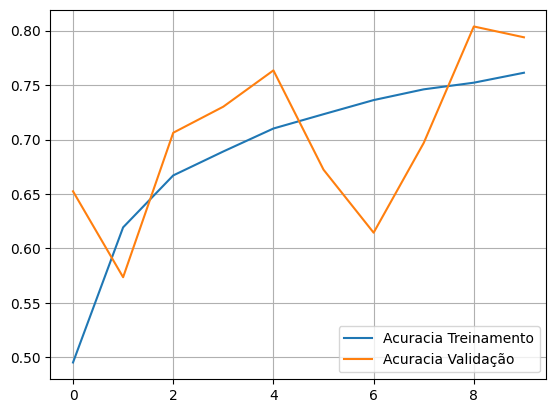

In [23]:
acc = hist.history['accuracy']
validation_acc = hist.history['val_accuracy']

range_epochs = np.arange(15)

plt.figure()
plt.plot(range_epochs,acc, label='Acuracia Treinamento')
plt.plot(range_epochs,validation_acc, label='Acuracia Validação')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()